# Tarea 4 Clasificación
En este ejercicio aplicarás tres modelos de clasificación:
- K-Nearest Neighbors (KNN)
- Naive Bayes
- Regresión Logística

El objetivo es detectar un hongo es comestible o venenoso según sus especificaciones como la forma del sombrero, el color del sombrero, el color de las branquias, etc.

### Isaac Ernesto Vazquez Sandoval - 745369

In [38]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

In [39]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [41]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Observa como se distribuye tu variable target "class". Presenta un desbalanceo grave/moderado/bajo?

- El desbalanceo es bajo

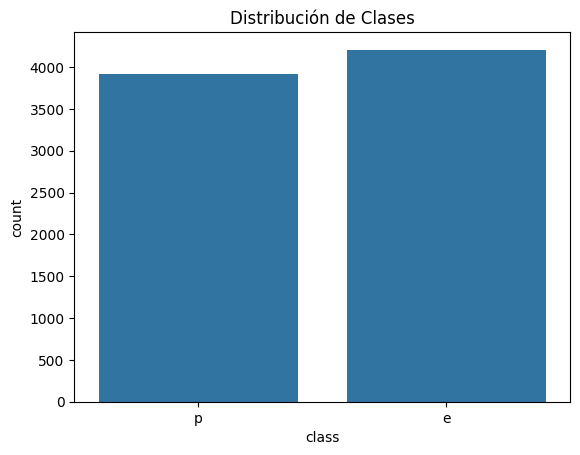

class
e    0.517971
p    0.482029
Name: proportion, dtype: float64


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [42]:
sns.countplot(x='class', data=df)
plt.title('Distribución de Clases')
plt.show()

print(df['class'].value_counts(normalize=True))
df.isnull().sum()

Asegura que tus variables sean del tipo category

In [ ]:
for col in df.columns:
    df[col] = df[col].astype('category')

df.info()

print("\nCardinalidad de las columnas:")
print(df.nunique())

df = df.drop('veil-type', axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego

Transforma tus variables categorias, como todas las variables que tienes son categoricas, preguntate si vale la pena usar mejor one hot encoding o label encoding. 

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.columns:
    df[column] = le.fit_transform(df[column])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


Revisa la cardinalidad de las columnas que tienes y verifica si todas aportan valor o existe alguna que puedas eliminar

In [ ]:
from sklearn.model_selection import train_test_split

# veil-type
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Divide tus datos en entrenamiento y prueba

In [46]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Entrena los siguentes 3 modelos:
- Regresion logistica
- KNN (tunea el hiperparametro de la K)
- Naive Bayes

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

Matriz de Confusión:
[[843   0]
 [  0 782]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [48]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Resultados para Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_nb))

Resultados para Naive Bayes:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       843
           1       0.91      0.93      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625

Matriz de Confusión:
[[771  72]
 [ 55 727]]


In [53]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_range = range(1, 15)
best_k = 0
best_score = 0

for k in k_range:
    knn_tune = KNeighborsClassifier(n_neighbors=k)
    knn_tune.fit(X_train, y_train)
    score = knn_tune.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score

print(f"Mejor valor de K: {best_k} con un Accuracy de: {best_score:.4f}")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(f"\nResultados para KNN (k={best_k}):")
print(classification_report(y_test, y_pred_knn))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_knn))

Mejor valor de K: 2 con un Accuracy de: 1.0000

Resultados para KNN (k=2):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Matriz de Confusión:
[[843   0]
 [  0 782]]


In [50]:
# Regresión Logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Resultados para Regresión Logística:")
print(classification_report(y_test, y_pred_lr))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_lr))

Resultados para Regresión Logística:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Matriz de Confusión:
[[799  44]
 [ 41 741]]


Haz predicciones e imprime:
- Metricas en train y test
- Matriz de confusion
- Reporte de clasificacion

In [51]:
sample = X_test.iloc[0]
true_label = y_test.iloc[0]

prediction = model.predict([sample])

print(f"Muestra: {sample.values}")
print(f"Predicción: {'Comestible' if prediction[0] == 0 else 'Venenoso'}")
print(f"Etiqueta Real: {'Comestible' if true_label == 0 else 'Venenoso'}")

Muestra: [2 0 4 0 5 1 1 0 3 1 3 2 0 7 7 2 1 0 3 3 1]
Predicción: Comestible
Etiqueta Real: Comestible


/home/isaac/Documents/code/python/data_modeling/classification/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Utiliza la curva ROC para elegir el mejor modelo

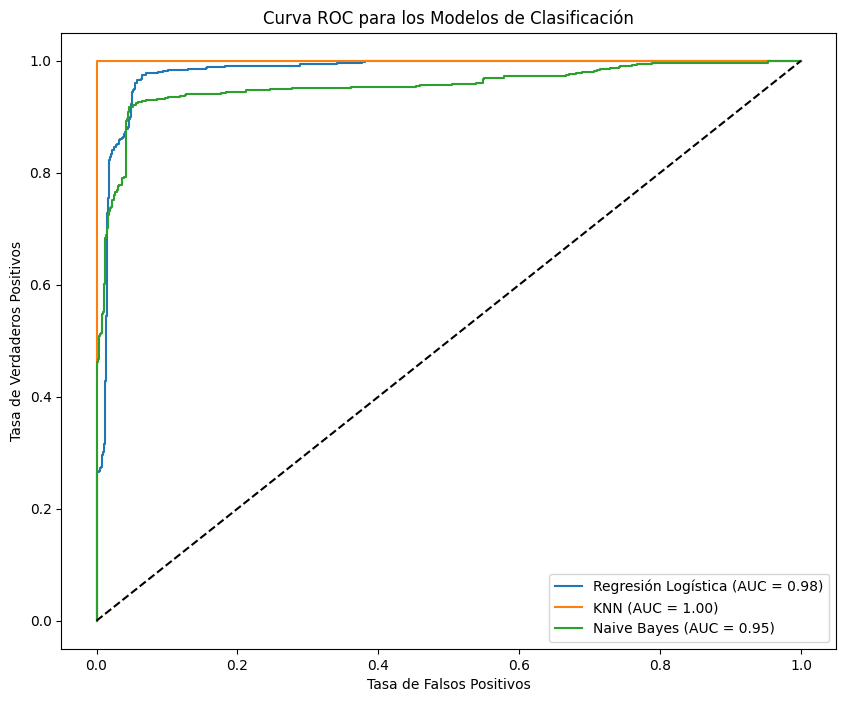

In [ ]:
plt.figure(figsize=(10, 8))

# Regresión Logística
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Regresión Logística (AUC = {auc_lr:.2f})')

# KNN
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
auc_knn = auc(fpr_knn, tpr_knn)
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')

# Naive Bayes
y_pred_proba_nb = nb.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
auc_nb = auc(fpr_nb, tpr_nb)
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para los Modelos de Clasificación')
plt.legend()
plt.show()